In [1]:
from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [2]:
sequential = False
epochs = 1
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

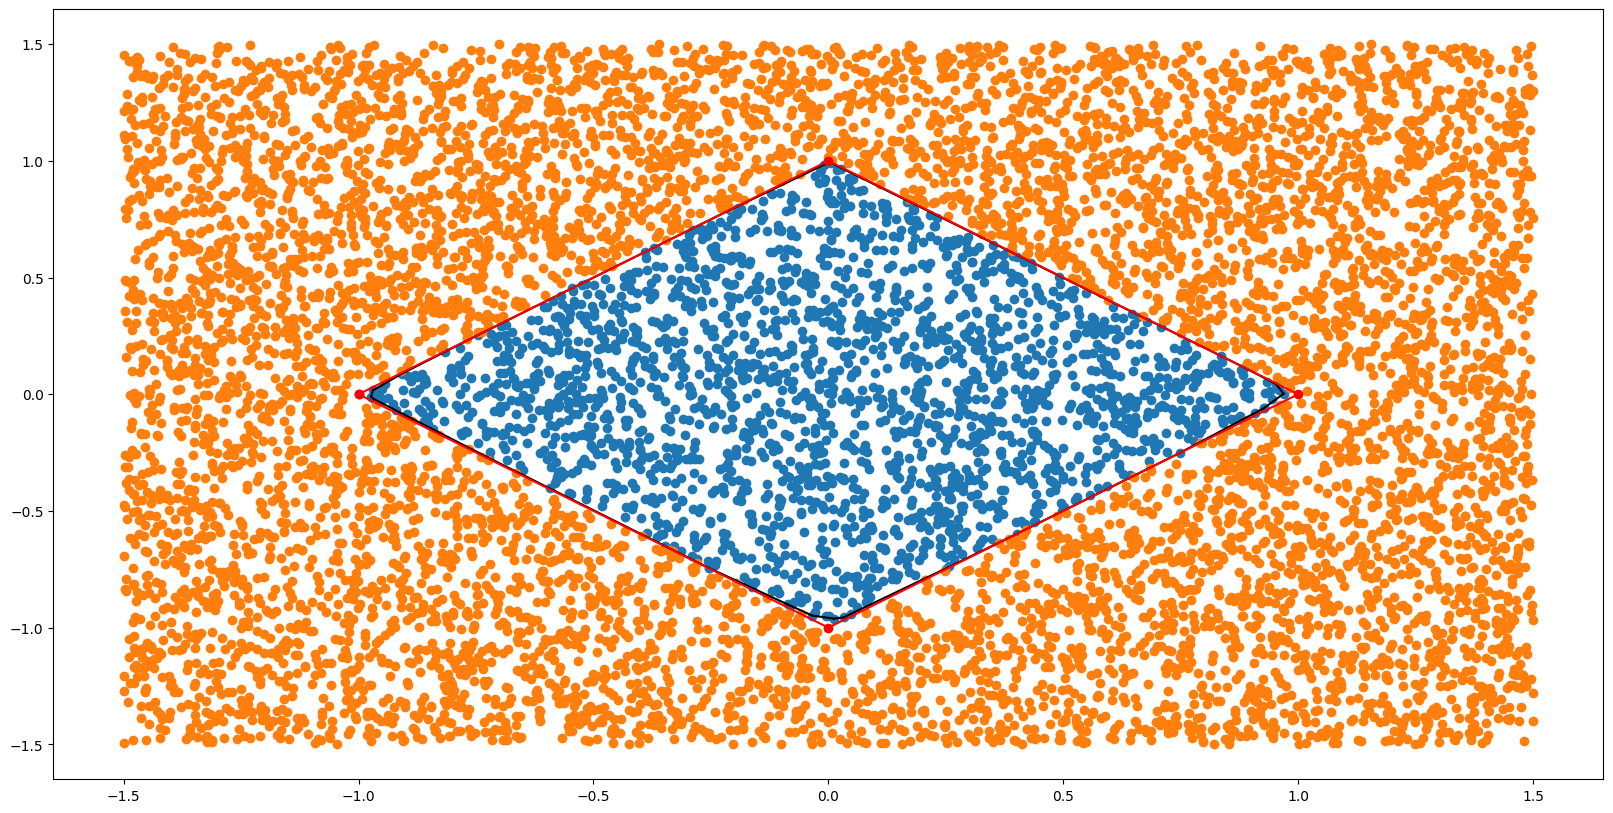

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()


In [5]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential)

=== Epoch: 0===
batch = 0, mean loss = 1.469659665294078
batch = 100, mean loss = 1.443456059790847
batch = 200, mean loss = 1.4487728585012165
batch = 300, mean loss = 1.4271331264984832
batch = 400, mean loss = 1.3901168625095734
batch = 500, mean loss = 1.3671912897758622
batch = 600, mean loss = 1.337911413002256
batch = 700, mean loss = 1.3075173009356558
batch = 800, mean loss = 1.2789980360148907
batch = 900, mean loss = 1.246145969036855
batch = 1000, mean loss = 1.2114178231270263
batch = 1100, mean loss = 1.1775362864145325
batch = 1200, mean loss = 1.1478164478986899
batch = 1300, mean loss = 1.1184000885430145
batch = 1400, mean loss = 1.0875649175805355
batch = 1500, mean loss = 1.0634390196015606
batch = 1600, mean loss = 1.0386323769122399
batch = 1700, mean loss = 1.0149511649492773
batch = 1800, mean loss = 0.9914731495583465
batch = 1900, mean loss = 0.9677796314895353
batch = 2000, mean loss = 0.9471306754540401
batch = 2100, mean loss = 0.9266418285050896
batch = 21

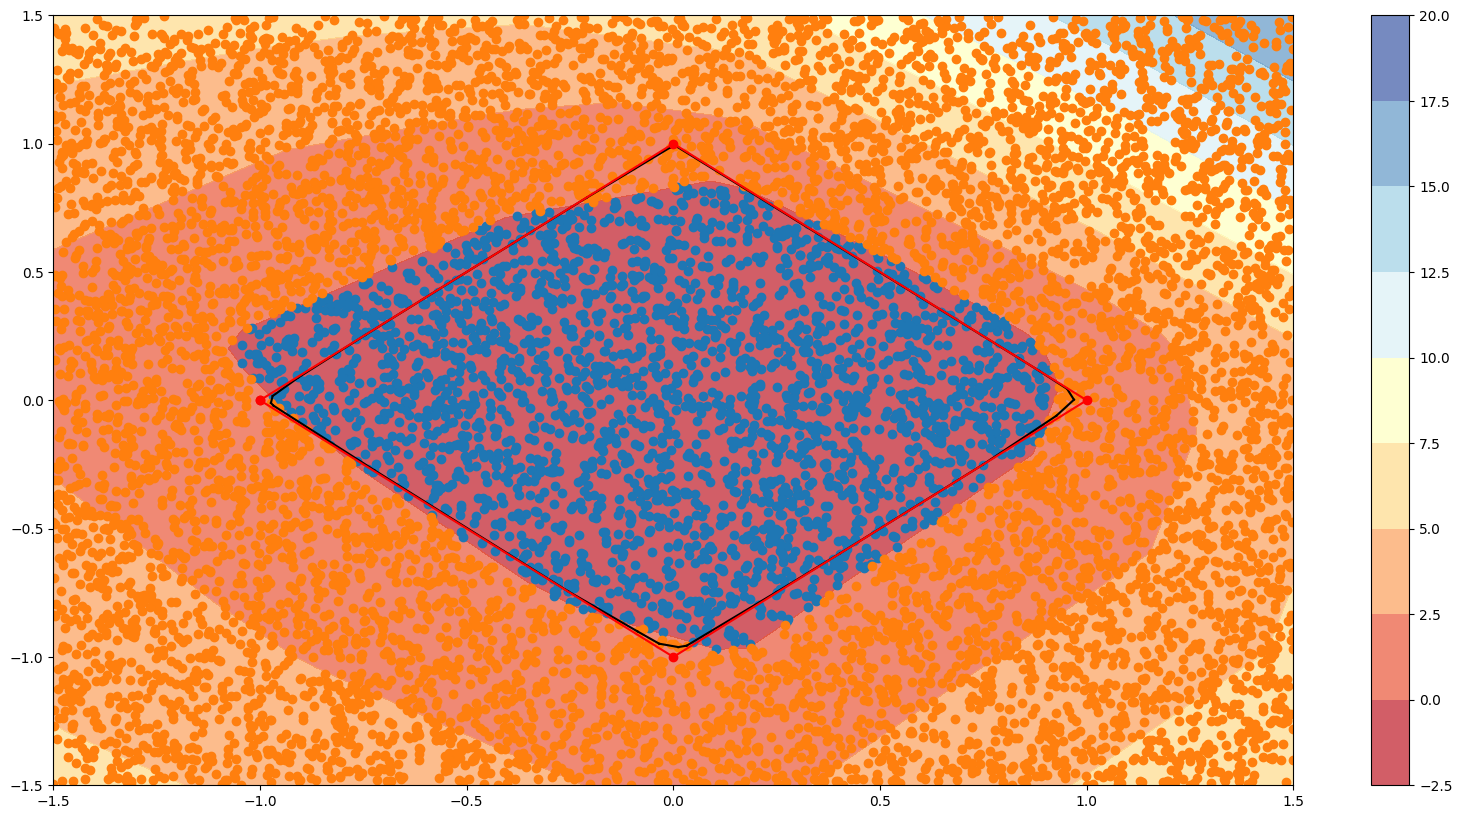

In [6]:
plots.plt_mesh()

In [7]:
result = verification(icnn, sequential)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 388 nonzeros
Model fingerprint: 0x52fd0939
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [7e-03, 1e+02]
Presolve removed 63 rows and 41 columns
Presolve time: 0.00s
Presolved: 75 rows, 55 columns, 293 nonzeros
Variable types: 38 continuous, 17 integer (17 binary)

Root relaxation: objective 1.374686e+01, 38 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

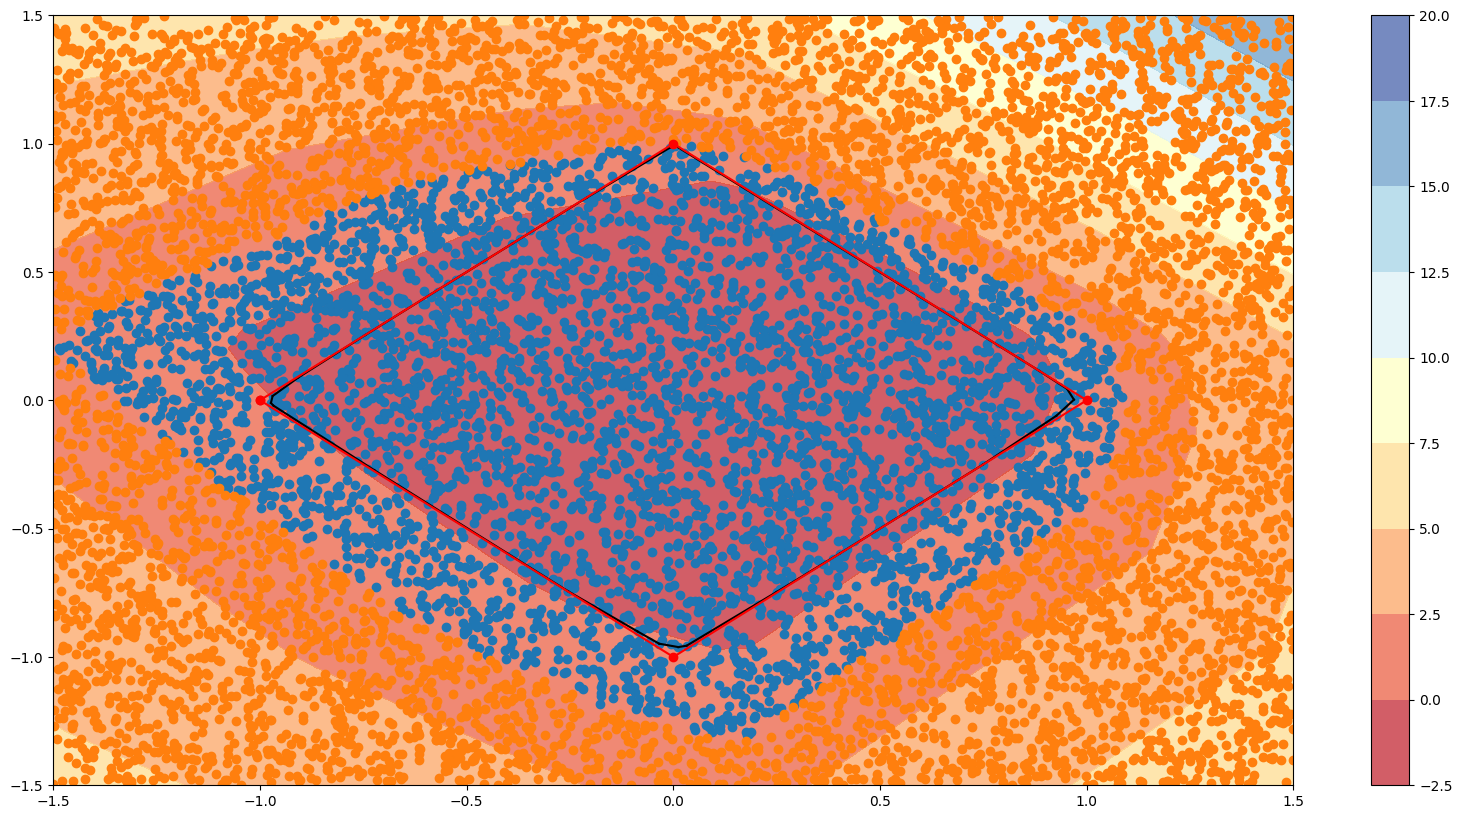

In [8]:
plots.c = result
plots.plt_mesh()